In [305]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import constants

In [306]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['font.size'] = 22

In [307]:
def processData(file_name):
    ''' data --> vectors '''
    file = open(file_name, 'r')
    processing = False
    x, y, data = [], [], []

    for line in file:
        if 'A004USERDEFINED' in line:
            processing = True
            continue
        
        if processing == True:
            cleaned = line.split()[1:]
            x = x + [int(cleaned[0]) + i for i in range(5)]
            y.extend(cleaned[1:])
        
    x = np.array(x)
    for i, item in enumerate(y):
        y[i] = int(item)
    y = np.array(y) # counts
    
    return x, y

In [308]:
def get_x_val(energy, m, b): 
    '''get the x index that matches the energy'''
    return int((energy-b)/(m))

In [309]:
def get_energy(channel):
    return (constants.CALIB_SLOPE*channel) + constants.CALIB_INT

## Visualize Data to help get peaks

In [310]:
data_file=constants.BA_FILE
x,y = processData(data_file)
m, b = constants.CALIB_SLOPE, constants.CALIB_INT

In [311]:
print(get_x_val(32194, m, b))

2267


Text(0.5, 1.0, 'Ba Channel vs. Count')

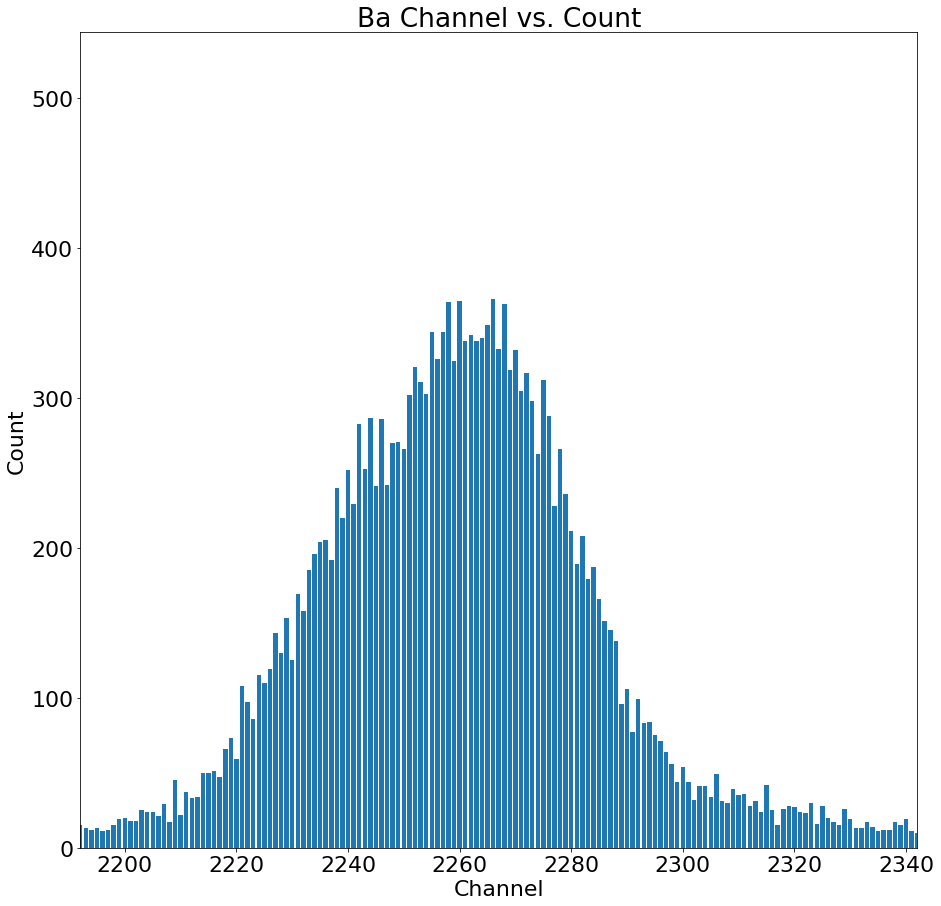

In [312]:
bounds = [2267-75, 2267+75]
plt.bar(x,y)
plt.xlim(bounds)
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Ba Channel vs. Count')

In [316]:
def sqrt_error(x, error):
    return error / (2*np.sqrt(x))

## Plot peaks vs. atomic number

In [321]:
elements = [47, 56, 29, 42, 37, 65]
x = []
y = []

peaks = {'Ag': 1556,
         'Ba': 2267,
         'Cu': 566,
         'Mo': 1229,
         'Rb': 941,
         'Tb': 3136
        }

for i, mol in enumerate(peaks):
    peaks[mol] = {'peak': peaks[mol], 'Z': elements[i]}
    x.append(peaks[mol]['Z'])
    y.append(get_energy(peaks[mol]['peak']))

x, y = np.sort(np.array(x)), np.sort(np.array(y))
print(y)
error = y*0.0175
print(constants.RESOLUTION)
print(np.sqrt(y))
error = sqrt_error(y, error)

[ 8039.147 13364.147 17453.747 22097.147 32193.347 44533.147]
0.00124
[ 89.66129042 115.60340393 132.11262998 148.65109149 179.42504563
 211.0287824 ]


Text(0.5, 0, 'Atomic Number (Z)')

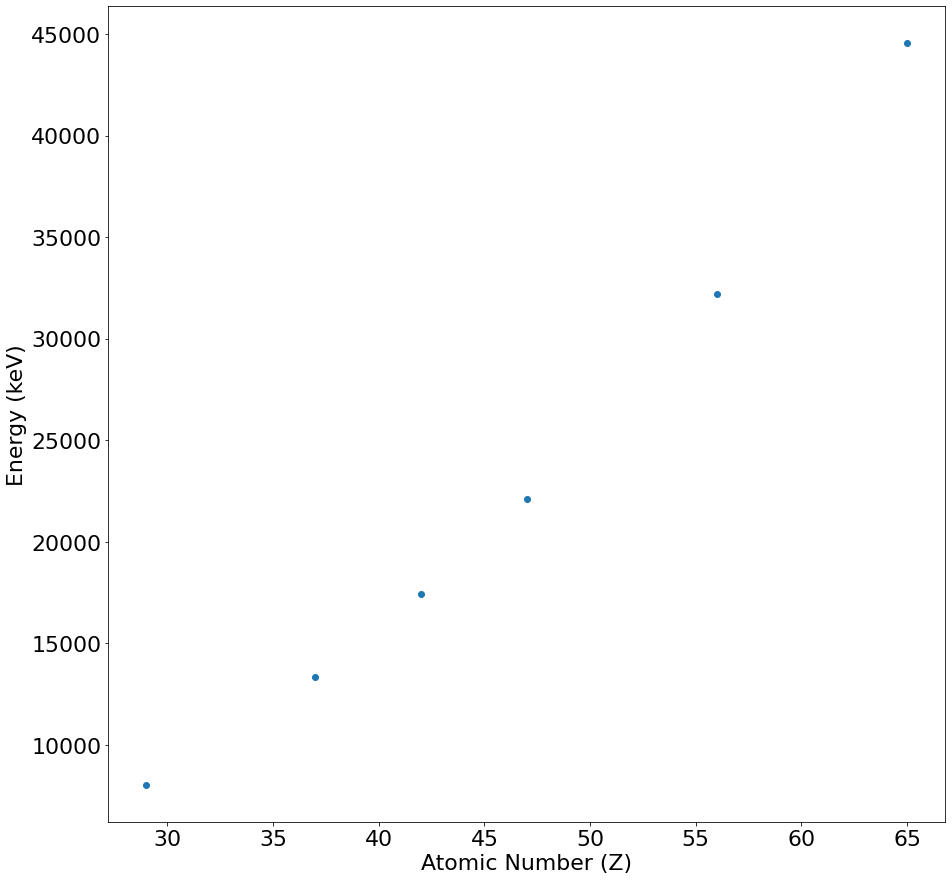

In [322]:
plt.scatter(x,y)
plt.ylabel("Energy (keV)")
plt.xlabel("Atomic Number (Z)")

In [323]:
X,y = x.reshape((-1,1)), np.sqrt(y)
x_plot = np.array([-12, 75]).reshape((-1,1))
model = LinearRegression()
model.fit(X,y)
y_plot = model.predict(x_plot)
print(f'coefficient of determination: {model.score(X,y)}')
print(f'model intercept: {model.intercept_}')
print(f'model coef: {model.coef_}')

coefficient of determination: 0.9997279415204554
model intercept: -9.024537301698984
model coef: [3.3718459]


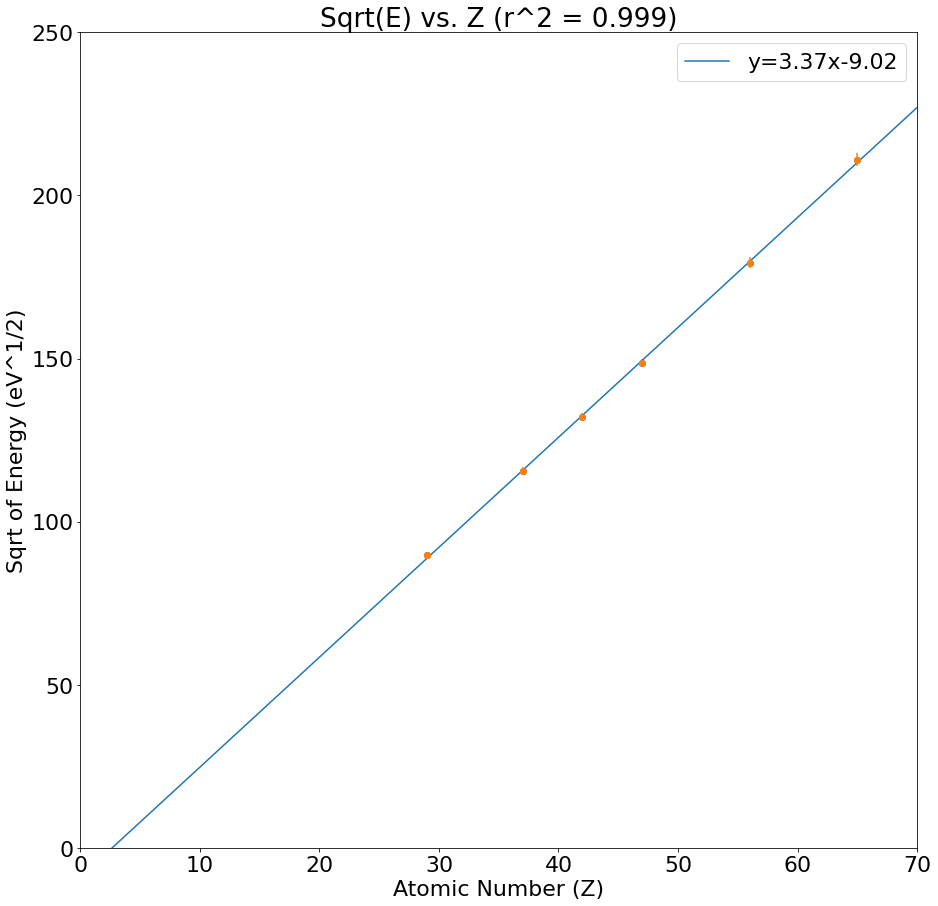

In [324]:
plt.scatter(x,y)
plt.plot(x_plot, y_plot, label='y=3.37x-9.02')
plt.errorbar(x, y,
             yerr = error,
             fmt ='o')
plt.xlim([0,70])
plt.ylim([0, 250])
plt.ylabel("Sqrt of Energy (eV^1/2)")
plt.xlabel("Atomic Number (Z)")
plt.title("Sqrt(E) vs. Z (r^2 = 0.999)")
plt.legend()

# sigma = 2.68

In [297]:
print(y)

[ 89.66129042 115.60340393 132.11262998 148.65109149 179.42504563
 211.0287824 ]


## Theoretical

In [298]:
E = np.sqrt(np.array([8046.3, 13396, 17480, 22163, 32194, 44482]))
x = np.array([29, 37, 42, 47, 56, 65]).reshape((-1,1))

In [299]:
print(E)
print(x)

[ 89.70117056 115.74109037 132.21195105 148.87242861 179.42686532
 210.90756269]
[[29]
 [37]
 [42]
 [47]
 [56]
 [65]]


In [300]:
x_plot = np.array([-12, 75]).reshape((-1,1))
model = LinearRegression()
model.fit(x,E)
y_plot = model.predict(x_plot)
print(f'coefficient of determination: {model.score(x,E)}')
print(f'model intercept: {model.intercept_}')
print(f'model coef: {model.coef_}')

coefficient of determination: 0.9997876206931798
model intercept: -8.723910466953896
model coef: [3.36668308]


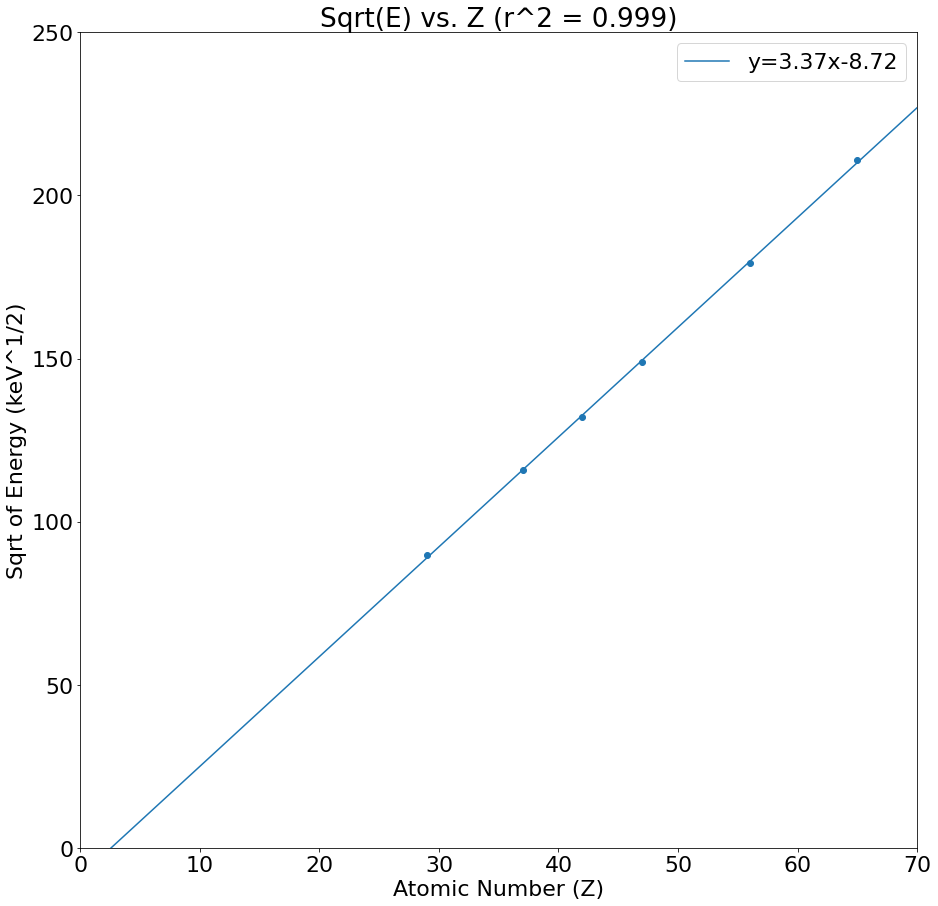

In [304]:
plt.scatter(x,E)
plt.plot(x_plot, y_plot, label='y=3.37x-8.72')
plt.xlim([0,70])
plt.ylim([0,250])
plt.ylabel("Sqrt of Energy (keV^1/2)")
plt.xlabel("Atomic Number (Z)")
plt.title("Sqrt(E) vs. Z (r^2 = 0.999)")
plt.legend()